### 1) Загрузите данные ex8data1.mat из файла.

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

In [2]:
DATA_PATH = '/home/ataleckij/Projects/university/mo/Data/Lab 8/'

In [3]:
files_names = os.listdir(DATA_PATH)
print(files_names)
files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

['ex8data2.mat', 'ex8data1.mat']


In [4]:
from scipy.io import loadmat

data1 = loadmat(files_paths[1])
data2 = loadmat(files_paths[0])

X1, X1_val, y1_val = data1['X'], data1['Xval'], data1['yval'].flatten()
print(X1.shape, X1_val.shape, y1_val.shape)

X2, X2_val, y2_val = data2['X'], data2['Xval'], data2['yval'].flatten()
print(X2.shape, X2_val.shape, y2_val.shape)

(307, 2) (307, 2) (307,)
(1000, 11) (100, 11) (100,)


### 2) Постройте график загруженных данных в виде диаграммы рассеяния.

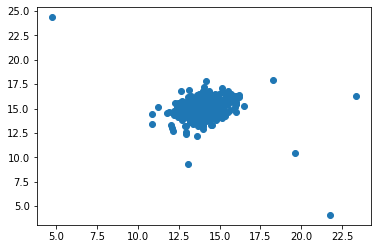

In [5]:
plt.scatter(X1[:, 0], X1[:, 1])
plt.show()

### 3) Представьте данные в виде двух независимых нормально распределенных случайных величин.
### 4) Оцените параметры распределений случайных величин.

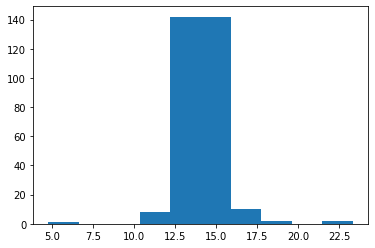

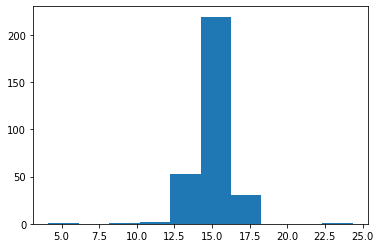

In [6]:
plt.hist(X1[:, 0])
plt.show()

plt.hist(X1[:, 1])
plt.show()

In [7]:
print(X1[:, 0].mean(), X1[:, 0].std())
print(X1[:, 1].mean(), X1[:, 1].std())

14.112225783945592 1.353747174879607
14.99771050813621 1.3075723042450764


In [8]:
X10_mu, X10_sigma = X1[:, 0].mean(), X1[:, 0].std()
X11_mu, X11_sigma = X1[:, 1].mean(), X1[:, 1].std()

X10s = np.linspace(-5*X10_sigma + X10_mu, 5*X10_sigma + X10_mu, 100)
X11s = np.linspace(-5*X11_sigma + X11_mu, 5*X11_sigma + X11_mu, 100)

In [9]:
@np.vectorize
def proba(x, mu, sigma):
    sigma_sqr = sigma ** 2
    return np.exp(-((x-mu)**2)/(2*sigma_sqr)) / (np.sqrt(2*np.pi) * sigma)

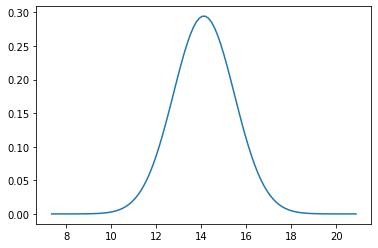

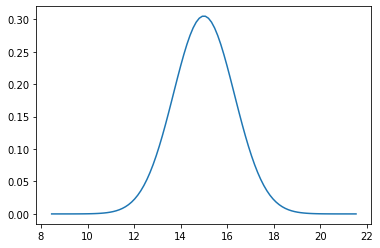

In [10]:
plt.plot(X10s, proba(X10s, mu=X10_mu, sigma=X10_sigma))
plt.show()

plt.plot(X11s, proba(X11s, mu=X11_mu, sigma=X11_sigma))
plt.show()

### 5) Постройте график плотности распределения получившейся случайной величины в виде изолиний, совместив его с графиком из пункта 2.

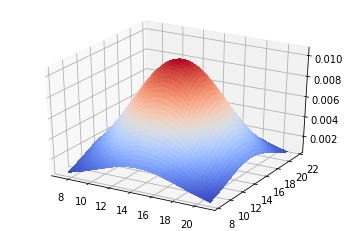

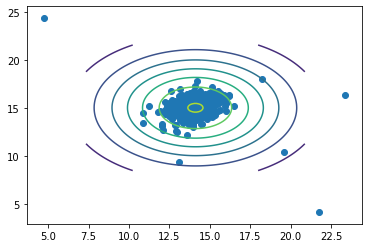

In [11]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

X10s, X11s = np.meshgrid(X10s, X11s)

X1_probas_plot = np.prod([proba(feature, mu=feature.mean(), sigma=feature.std()) 
                          for feature in [X10s.flatten(), X11s.flatten()]]
                         , axis=0)
X1_probas_plot = X1_probas_plot.reshape(X10s.shape)

surf = ax.plot_surface(X10s, X11s, X1_probas_plot, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

fig, ax = plt.subplots()
CS = ax.contour(X10s, X11s, X1_probas_plot)
# ax.clabel(CS, inline=1, fontsize=10)
plt.scatter(X1[:, 0], X1[:, 1])
plt.show()

### 6) Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

In [12]:
X1_val_probas = np.prod([proba(feature, mu=feature.mean(),
                               sigma=feature.std()) 
                         for feature in X1_val.T], axis=0)

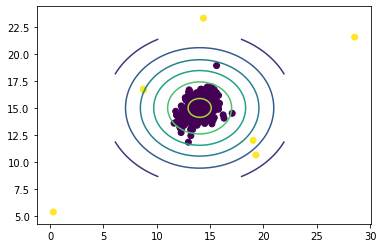

In [13]:
X10_val_mu, X10_val_sigma = X1_val[:, 0].mean(), X1_val[:, 0].std()
X11_val_mu, X11_val_sigma = X1_val[:, 1].mean(), X1_val[:, 1].std()

X10_vals = np.linspace(-5*X10_val_sigma + X10_val_mu, 5*X10_val_sigma + X10_val_mu, 100)
X11_vals = np.linspace(-5*X11_val_sigma + X11_val_mu, 5*X11_val_sigma + X11_val_mu, 100)

X10_vals, X11_vals = np.meshgrid(X10_vals, X11_vals)
X1_val_probas_plot = np.prod([proba(feature, mu=feature.mean(), sigma=feature.std()) 
                              for feature in [X10_vals.flatten(), X11_vals.flatten()]]
                             , axis=0)
X1_val_probas_plot = X1_val_probas_plot.reshape(X10_vals.shape)

fig, ax = plt.subplots()
CS = ax.contour(X10_vals, X11_vals, X1_val_probas_plot)
# ax.clabel(CS, inline=1, fontsize=10)
plt.scatter(X1_val[:, 0], X1_val[:, 1], c=y1_val)
plt.show()

In [16]:
from sklearn.metrics import f1_score, recall_score, precision_score

def anomaly_loss(treshold, X_probas, y):
    y_pred = (X_probas < treshold).astype('int8')
    return 1 - f1_score(y, y_pred)

from functools import partial

val1_loss = partial(anomaly_loss, X_probas=X1_val_probas, y=y1_val)

In [17]:
val1_loss(0.00;2)

0.17647058823529405

In [18]:
X1_proba = np.prod([proba(feature, mu=feature.mean(), sigma=feature.std()) 
                    for feature in X1.T], axis=0)

y1_pred = X1_proba < 0.001

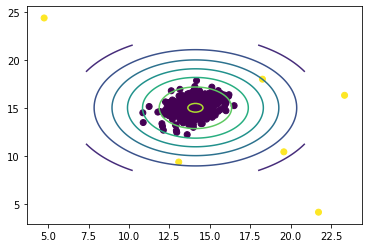

In [19]:
fig, ax = plt.subplots()
CS = ax.contour(X10s, X11s, X1_probas_plot)
# ax.clabel(CS, inline=1, fontsize=10)
plt.scatter(X1[:, 0], X1[:, 1], c=y1_pred)
plt.show()

In [20]:
proba(19.58257277, mu=X10_mu, sigma=X10_sigma) * proba(10.411619, mu=X11_mu, sigma=X11_sigma)

5.455672896257127e-08

In [21]:
proba(12.5, mu=X10_mu, sigma=X10_sigma) * proba(10, mu=X11_mu, sigma=X11_sigma)

2.975759845187981e-05

### 9) Представьте данные в виде 11-мерной нормально распределенной случайной величины.

In [22]:
print(X2.shape, X2_val.shape, y2_val.shape)

(1000, 11) (100, 11) (100,)


In [23]:
mu_vector = np.mean(X2, axis=0)
cov_matrix = np.cov(X2.T)

print(mu_vector.shape, cov_matrix.shape)

(11,) (11, 11)


In [24]:
print(mu_vector.round(2))

[  4.94  -9.64  13.81 -10.46  -7.96  10.2   -6.02   7.97  -6.25   2.32
   8.47]


In [25]:
print(cov_matrix.round(2))

[[61.04  1.31  0.69  0.13  4.68 -0.53 -3.38  4.95 -1.16  3.92 -2.91]
 [ 1.31 53.26 -2.23 -4.61  1.73  3.08  1.38  7.52  4.2  -4.83  7.72]
 [ 0.69 -2.23 58.57  2.63  3.31 -3.39  2.85  2.18  7.24  5.89 -2.85]
 [ 0.13 -4.61  2.63 84.29  1.91  1.43  3.77  2.57 -4.18  1.91 -1.23]
 [ 4.68  1.73  3.31  1.91 65.33  1.18  5.41 -2.53  0.75  4.02 -0.52]
 [-0.53  3.08 -3.39  1.43  1.18 89.66  2.26  1.33 -0.12 -3.43  1.28]
 [-3.38  1.38  2.85  3.77  5.41  2.26 55.69 -1.63 -1.57 -1.46 -5.36]
 [ 4.95  7.52  2.18  2.57 -2.53  1.33 -1.63 87.25  3.66 -1.27  2.37]
 [-1.16  4.2   7.24 -4.18  0.75 -0.12 -1.57  3.66 29.66 -0.47  2.35]
 [ 3.92 -4.83  5.89  1.91  4.02 -3.43 -1.46 -1.27 -0.47 70.86 -0.34]
 [-2.91  7.72 -2.85 -1.23 -0.52  1.28 -5.36  2.37  2.35 -0.34 50.55]]


In [30]:
multi_normal = multivariate_normal(mu_vector, cov_matrix)

### 11) одберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

In [32]:
tresholds = np.linspace(0, 1e-15, 50000)

f1_scores = []
for treshold_value in tresholds:
    y_pred = multi_normal.pdf(X2_val) < treshold_value
    f1_scores.append(f1_score(y2_val, y_pred)) 

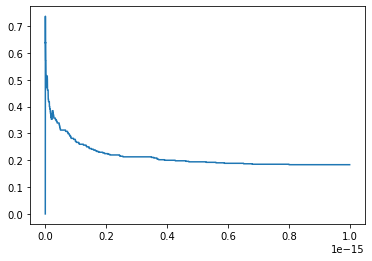

In [33]:
plt.plot(tresholds, f1_scores)
plt.show()

### 12) Выделите аномальные наблюдения в обучающей выборке. Сколько их было обнаружено? Какой был подобран порог?

In [34]:
best_i = np.argmax(f1_scores)
print(tresholds[best_i], f1_scores[best_i])

1.8000360007200148e-19 0.7368421052631577


In [35]:
y_pred = multi_normal.pdf(X2) < tresholds[best_i]
y_pred.sum()

36